# 2015 US Flight Disruption Data Exploration
### by Stephani Marcelli Djojo (June 2020)

## Data Wrangling
This document tells exploration result of a dataset of **2015 flight delays and cancellations** which was published by the U.S. Department of Transportation's Bureau of Transportation Statistics (source: <a href='https://www.kaggle.com/usdot/flight-delays'>Kaggle</a>). This documment figures out what are the best and worst airlines in terms of flight disrupt

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import time
import math
import re

%matplotlib inline

***Gather***

In [2]:
# load in the dataset into a pandas dataframe, print dataset shape
df_flight = pd.read_csv('../data/flight_delays/flights.csv')
print(df_flight.shape)

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(5819079, 31)


In [3]:
# remove some columns from dataset which aren't used in this exploration
remove_cols = [
    'YEAR',
    'FLIGHT_NUMBER','TAIL_NUMBER',
    'SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY',
    'TAXI_OUT','WHEELS_OFF','ELAPSED_TIME','AIR_TIME',
    'WHEELS_ON','TAXI_IN','SCHEDULED_ARRIVAL','ARRIVAL_TIME','ARRIVAL_DELAY'
]
df_flight = df_flight.drop(remove_cols, axis=1)

In [4]:
print(df_flight.shape)
df_flight.head()

(5819079, 16)


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,DISTANCE,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,ANC,SEA,205.0,1448,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,LAX,PBI,280.0,2330,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,SFO,CLT,286.0,2296,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,LAX,MIA,285.0,2342,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,SEA,ANC,235.0,1448,0,0,NaN,NaN,NaN,NaN,NaN,NaN


***Assess***

In [5]:
# get dataset info
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   ORIGIN_AIRPORT       object 
 5   DESTINATION_AIRPORT  object 
 6   SCHEDULED_TIME       float64
 7   DISTANCE             int64  
 8   DIVERTED             int64  
 9   CANCELLED            int64  
 10  CANCELLATION_REASON  object 
 11  AIR_SYSTEM_DELAY     float64
 12  SECURITY_DELAY       float64
 13  AIRLINE_DELAY        float64
 14  LATE_AIRCRAFT_DELAY  float64
 15  WEATHER_DELAY        float64
dtypes: float64(6), int64(6), object(4)
memory usage: 710.3+ MB


In [6]:
# get num of unique values each column of dataset
df_flight.nunique()

MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
ORIGIN_AIRPORT          930
DESTINATION_AIRPORT     930
SCHEDULED_TIME          550
DISTANCE               1363
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

In [7]:
# get num of missing value
for col in df_flight.columns:
    print('{:20} null-value: {:>8}'.format(col,sum(df_flight[col].isna())))

MONTH                null-value:        0
DAY                  null-value:        0
DAY_OF_WEEK          null-value:        0
AIRLINE              null-value:        0
ORIGIN_AIRPORT       null-value:        0
DESTINATION_AIRPORT  null-value:        0
SCHEDULED_TIME       null-value:        6
DISTANCE             null-value:        0
DIVERTED             null-value:        0
CANCELLED            null-value:        0
CANCELLATION_REASON  null-value:  5729195
AIR_SYSTEM_DELAY     null-value:  4755640
SECURITY_DELAY       null-value:  4755640
AIRLINE_DELAY        null-value:  4755640
LATE_AIRCRAFT_DELAY  null-value:  4755640
WEATHER_DELAY        null-value:  4755640


In [8]:
# get unique values of categorical columns
selected_cols = ['DAY_OF_WEEK','AIRLINE','DIVERTED','CANCELLED','CANCELLATION_REASON']
for i in range(len(selected_cols)):
    print('{:20} {}'.format(selected_cols[i], df_flight[selected_cols[i]].unique()))

DAY_OF_WEEK          [4 5 6 7 1 2 3]
AIRLINE              ['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'MQ' 'F9' 'WN' 'VX']
DIVERTED             [0 1]
CANCELLED            [0 1]
CANCELLATION_REASON  [nan 'A' 'B' 'C' 'D']


In [9]:
# get summary statistic of numeric columns
numeric_cols = [
    'SCHEDULED_TIME','DISTANCE',
    'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','SECURITY_DELAY','WEATHER_DELAY'
]
df_flight.loc[:,numeric_cols].describe()

,SCHEDULED_TIME,DISTANCE,AIR_SYSTEM_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,SECURITY_DELAY,WEATHER_DELAY
count,5.819073e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,1.416859e+02,8.223565e+02,1.348057e+01,1.896955e+01,2.347284e+01,7.615387e-02,2.915290e+00
std,7.521058e+01,6.077843e+02,2.800368e+01,4.816164e+01,4.319702e+01,2.143460e+00,2.043334e+01
min,1.800000e+01,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.500000e+01,3.730000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.230000e+02,6.470000e+02,2.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
75%,1.730000e+02,1.062000e+03,1.800000e+01,1.900000e+01,2.900000e+01,0.000000e+00,0.000000e+00
max,7.180000e+02,4.983000e+03,1.134000e+03,1.971000e+03,1.331000e+03,5.730000e+02,1.211000e+03


***Clean***

Define: Clean data quality issues.
- DIVERTED. Convert datatype integer to boolean.
- CANCELLED. Convert datatype integer to boolean.
- Create column DELAYED (boolean): True if any `*_DELAY` > 0
- Create column DELAY_TIME (float): Sum `*_DELAY`
- Create column DEPARTURE_DATE (datetime): generate date from MONTH and DAY columns.
- CANCELLATION_REASON. Map value.

Code & Test: Clean data quality issues to get cleaned flight dataset `df_flight_raw`.

In [10]:
# copy original dataset
df_flight_raw = df_flight.copy()

In [11]:
# convert datatype DIVERTED and CANCELLED from integer to boolean
df_flight_raw['DIVERTED'] = df_flight_raw['DIVERTED'].apply(lambda x: bool(x))
df_flight_raw['CANCELLED'] = df_flight_raw['CANCELLED'].apply(lambda x: bool(x))

In [12]:
# create DELAYED column
idx = df_flight_raw.query('AIR_SYSTEM_DELAY>0 | SECURITY_DELAY>0 | AIRLINE_DELAY>0 | LATE_AIRCRAFT_DELAY>0 | WEATHER_DELAY>0').index
df_flight_raw['DELAYED']=False
df_flight_raw.loc[idx,'DELAYED']=True

In [13]:
# create DELAY_TIME column
df_flight_raw['DELAY_TIME']=df_flight_raw['AIR_SYSTEM_DELAY']\
                            +df_flight_raw['AIRLINE_DELAY']\
                            +df_flight_raw['LATE_AIRCRAFT_DELAY']\
                            +df_flight_raw['SECURITY_DELAY']\
                            +df_flight_raw['WEATHER_DELAY']

In [14]:
# create DEPARTURE_DATE column
df_flight_raw['DEPARTURE_DATE'] = pd.to_datetime((2015*10000\
                                              +df_flight_raw['MONTH']*100\
                                              +df_flight_raw['DAY']).apply(str),format='%Y%m%d')

In [15]:
# map CANCELLATION_REASON value
def map_cancel_reason(code):
    if code=='A': return "Airline/Carrier"
    elif code=='B': return "Weather"
    elif code=='C': return "National Air System"
    elif code=='D': return "Security"
    else: return code

df_flight_raw['CANCELLATION_REASON'] = df_flight_raw['CANCELLATION_REASON']\
                                            .apply(lambda x: map_cancel_reason(x))

In [16]:
print(df_flight_raw.shape)
print(df_flight_raw.info())
df_flight_raw.head(5)

(5819079, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 19 columns):
 #   Column               Dtype         
---  ------               -----         
 0   MONTH                int64         
 1   DAY                  int64         
 2   DAY_OF_WEEK          int64         
 3   AIRLINE              object        
 4   ORIGIN_AIRPORT       object        
 5   DESTINATION_AIRPORT  object        
 6   SCHEDULED_TIME       float64       
 7   DISTANCE             int64         
 8   DIVERTED             bool          
 9   CANCELLED            bool          
 10  CANCELLATION_REASON  object        
 11  AIR_SYSTEM_DELAY     float64       
 12  SECURITY_DELAY       float64       
 13  AIRLINE_DELAY        float64       
 14  LATE_AIRCRAFT_DELAY  float64       
 15  WEATHER_DELAY        float64       
 16  DELAYED              bool          
 17  DELAY_TIME           float64       
 18  DEPARTURE_DATE       datetime64[ns]
dtypes: bool

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,DISTANCE,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED,DELAY_TIME,DEPARTURE_DATE
0,1,1,4,AS,ANC,SEA,205.0,1448,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,2015-01-01
1,1,1,4,AA,LAX,PBI,280.0,2330,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,2015-01-01
2,1,1,4,US,SFO,CLT,286.0,2296,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,2015-01-01
3,1,1,4,AA,LAX,MIA,285.0,2342,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,2015-01-01
4,1,1,4,AS,SEA,ANC,235.0,1448,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,2015-01-01


Define: Create summary dataset.
<pre>
DEPARTURE_DATE, AIRLINE, 
COUNT(1) as NUM_FLIGHT,
SUM(DELAYED) as NUM_DELAY_FLIGHT, SUM(CANCELLED) as NUM_CANCEL_FLIGHT, SUM(DIVERTED) as NUM_DIVERT_FLIGHT, 
SUM(DELAY_TIME) as SUM_DELAY_TIME, AVG(DELAY_TIME) AVG_DELAY_TIME, 
SUM(SCHEDULED_TIME) as SUM_SCHEDULED_TIME, AVG(SCHEDULED_TIME) as AVG_SCHEDULED_TIME
SUM(DISTANCE) as SUM_DISTANCE, AVG(DISTANCE) as AVG_DISTANCE
(NUM_DELAY_FLIGHT+NUM_CANCEL_FLIGHT+NUM_DIVERT_FLIGHT)/NUM_FLIGHT as DISRUPTION_RATE
</pre>

Code & Test: Create summary dataset `df_flight_agg`.

In [17]:
groupby_cols = ['DEPARTURE_DATE','MONTH','DAY','DAY_OF_WEEK','AIRLINE']
tmp_df1 = df_flight_raw.groupby(groupby_cols, as_index=False)[['ORIGIN_AIRPORT']].count()
tmp_df1.rename(columns={'ORIGIN_AIRPORT':'NUM_FLIGHT'}, inplace=True)

sum_cols = ['DELAYED','CANCELLED','DIVERTED','DELAY_TIME','SCHEDULED_TIME','DISTANCE']
tmp_df2 = df_flight_raw.groupby(groupby_cols, as_index=False)[sum_cols].sum()
tmp_df2.rename(columns={'DELAYED':'NUM_DELAY_FLIGHT',
                        'CANCELLED':'NUM_CANCEL_FLIGHT',
                        'DIVERTED':'NUM_DIVERT_FLIGHT',
                        'DELAY_TIME':'SUM_DELAY_TIME',
                        'SCHEDULED_TIME':'SUM_SCHEDULED_TIME',
                        'DISTANCE':'SUM_DISTANCE'}, inplace=True)

tmp_df3 = df_flight_raw.groupby(groupby_cols, as_index=False)[['DELAY_TIME','SCHEDULED_TIME','DISTANCE']].mean()
tmp_df3.rename(columns={'DELAY_TIME':'AVG_DELAY_TIME',
                        'SCHEDULED_TIME':'AVG_SCHEDULED_TIME',
                        'DISTANCE':'AVG_DISTANCE'}, inplace=True)

In [18]:
df_flight_agg = (tmp_df1.merge(tmp_df2, how='inner', on=groupby_cols)).merge(tmp_df3, how='inner', on=groupby_cols)
df_flight_agg['NUM_DISRUPTED_FLIGHT'] = (df_flight_agg['NUM_DELAY_FLIGHT']
                                        +df_flight_agg['NUM_CANCEL_FLIGHT']
                                        +df_flight_agg['NUM_DIVERT_FLIGHT'])
df_flight_agg['DISRUPTION_RATE'] = df_flight_agg['NUM_DISRUPTED_FLIGHT']/df_flight_agg['NUM_FLIGHT']

In [19]:
print(df_flight_agg.shape)
print(df_flight_agg.info())
df_flight_agg.head()

(4926, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4926 entries, 0 to 4925
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DEPARTURE_DATE        4926 non-null   datetime64[ns]
 1   MONTH                 4926 non-null   int64         
 2   DAY                   4926 non-null   int64         
 3   DAY_OF_WEEK           4926 non-null   int64         
 4   AIRLINE               4926 non-null   object        
 5   NUM_FLIGHT            4926 non-null   int64         
 6   NUM_DELAY_FLIGHT      4926 non-null   float64       
 7   NUM_CANCEL_FLIGHT     4926 non-null   float64       
 8   NUM_DIVERT_FLIGHT     4926 non-null   float64       
 9   SUM_DELAY_TIME        4926 non-null   float64       
 10  SUM_SCHEDULED_TIME    4926 non-null   float64       
 11  SUM_DISTANCE          4926 non-null   int64         
 12  AVG_DELAY_TIME        4925 non-null   float64       
 13  AVG_SCH

,DEPARTURE_DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,NUM_FLIGHT,NUM_DELAY_FLIGHT,NUM_CANCEL_FLIGHT,NUM_DIVERT_FLIGHT,SUM_DELAY_TIME,SUM_SCHEDULED_TIME,SUM_DISTANCE,AVG_DELAY_TIME,AVG_SCHEDULED_TIME,AVG_DISTANCE,NUM_DISRUPTED_FLIGHT,DISRUPTION_RATE
0,2015-01-01,1,1,4,AA,1473,455.0,93.0,1.0,27409.0,259461.0,1617465,60.239560,176.144603,1098.075356,549.0,0.372709
1,2015-01-01,1,1,4,AS,440,41.0,1.0,0.0,2086.0,83903.0,548941,50.878049,190.688636,1247.593182,42.0,0.095455
2,2015-01-01,1,1,4,B6,757,137.0,0.0,0.0,6161.0,134319.0,833440,44.970803,177.435931,1100.977543,137.0,0.180978
3,2015-01-01,1,1,4,DL,1559,102.0,0.0,1.0,6190.0,253881.0,1505065,60.686275,162.848621,965.404105,103.0,0.066068
4,2015-01-01,1,1,4,EV,1320,215.0,58.0,6.0,11459.0,137831.0,666353,53.297674,104.417424,504.812879,279.0,0.211364


### What is the structure of your dataset?
<p>There are 5,819,079 observations in the cleaned dataset (df_flight_raw) with 19 variables. Most variables are categorical data, while numeric data are exist only on the three valiable groups: distance, scheduled flight duration, and delay duration.</p>
<p>I created a cleaned summary dataset (df_flight_agg) with 4926 rows and 17 columns, which contains daily aggregate number of flights, delayed flights, cancelled flights, diverted flights, distance, schedule time, and delay time by departure date and airline. These variables are necessary to be created to be features to figure out relationships between features.</p>

### What is/are the main feature(s) of interest in your dataset?
Disruption rate (number of disrupted flights divided by number of flights) and airline are the main features of interest in these datasets. I am most interested in figuring out what are the best and worst airlines in terms of flight disruption handling.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
<p>Delay time, schedule time, and distance are numeric variables in the dataset that I think will help support my investigation. Departure day of week and month are also variables that I think will help support my investigation.</p>
<p>I expect there are positive relationship between delay time and disruption rate. I also expect there are relationships between seasonality (represented by departure dow and/or month) and disruption rate. </p>
<ul>
<li>Days of weekend have higher disruption rate. </li>
<li>High season (End year, mid year) have higher disruption rate.</li>
</ul>

## Univariate Exploration

I will start looking at number of flights by status (on schedule, delay, cancelled, and diverted) to know how many flight disruptions during 2015 in US.

In [20]:
# DISRUPTION_RATE

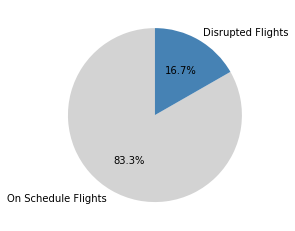

In [21]:
sizes = [df_flight_raw.shape[0],df_flight_raw.query('DELAYED==True | CANCELLED==True | DIVERTED==True').shape[0]]
labels = ['On Schedule Flights','Disrupted Flights']

plt.figure();
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgray','steelblue']);

In [22]:
# NUM_DELAY, NUM_CANCEL, NUM_DIVERTED

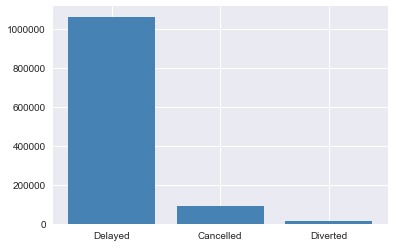

In [23]:
plt.style.use('seaborn')
plt.figure(figsize=[6,4]);
plt.bar(x='Delayed', height=sum(df_flight_agg.NUM_DELAY_FLIGHT), color='steelblue');
plt.bar(x='Cancelled', height=sum(df_flight_agg.NUM_CANCEL_FLIGHT), color='steelblue');
plt.bar(x='Diverted', height=sum(df_flight_agg.NUM_DIVERT_FLIGHT), color='steelblue');

In [24]:
df_flight_agg_airline = df_flight_agg.groupby('AIRLINE', as_index=False)\
                        [['NUM_DISRUPTED_FLIGHT','NUM_FLIGHT']]\
                        .sum()
df_flight_agg_airline['DISRUPTION_RATE'] = df_flight_agg_airline['NUM_DISRUPTED_FLIGHT']*1.0/df_flight_agg_airline['NUM_FLIGHT']

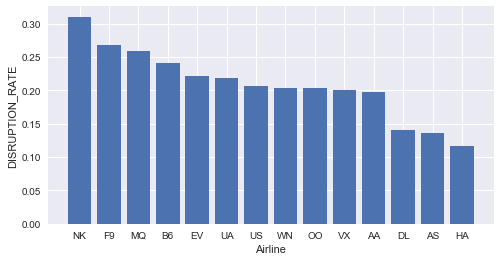

In [25]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=[8,4])

data = df_flight_agg_airline.sort_values(by='DISRUPTION_RATE', ascending=False)
ax.bar(x=data['AIRLINE'], height=data['DISRUPTION_RATE']);
    
ax.set_xlabel('Airline');
ax.set_ylabel('DISRUPTION_RATE');

<p>16.7% of US flights in 2015 were disrupted. Most cases were due to delayed flight. NK is the airline which has the highest disruption rate (relative to NK's flights), while HA is the airline which has the lowest disruption rate. </p>

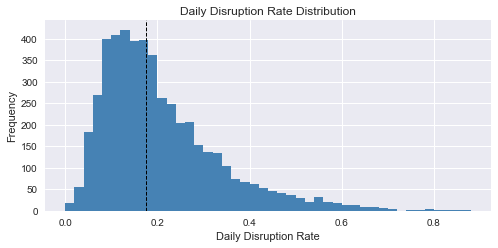

In [26]:
# plotting disruption rate on a standard scale
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=[8,3.5])

bin_edges = np.arange(0, df_flight_agg['DISRUPTION_RATE'].max()+0.02, 0.02) 
ax.hist(df_flight_agg['DISRUPTION_RATE'], bins=bin_edges,color='steelblue');
ax.axvline(df_flight_agg.dropna()['DISRUPTION_RATE'].median(), color='black', linestyle='dashed', linewidth=1, label='Median')

ax.set_title('Daily Disruption Rate Distribution');
ax.set_xlabel('Daily Disruption Rate');
ax.set_ylabel('Frequency');

In [27]:
df_flight_agg['DISRUPTION_RATE'].median()

0.17561468284469822

Daily disruption rate has right-skewed distribution where median at 0.1756.

<p>Let's look deeper to the first predictor variable: delay time.</p>

In [28]:
# DELAY_TIME

In [29]:
df_flight_raw.query('DELAYED==True')['DELAY_TIME'].describe()

count    1.063439e+06
mean     5.891440e+01
std      6.425032e+01
min      1.500000e+01
25%      2.300000e+01
50%      3.700000e+01
75%      7.000000e+01
max      1.971000e+03
Name: DELAY_TIME, dtype: float64

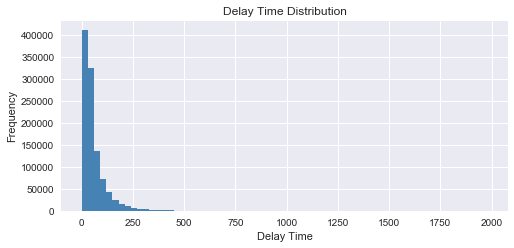

In [30]:
# plotting delay duration on a standard scale
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=[8,3.5])

bin_edges = np.arange(0, df_flight_raw.query('DELAYED==True')['DELAY_TIME'].max()+30, 30) 
ax.hist(df_flight_raw.query('DELAYED==True')['DELAY_TIME'], bins=bin_edges,color='steelblue');

ax.set_title('Delay Time Distribution');
ax.set_xlabel('Delay Time');
ax.set_ylabel('Frequency');

<p>Delay time has right-skewed disribution. Delay time has median at 37 mins, but there's a very long tail in the distribution (up to 1,971 mins delay time). Let's take a deeper look to delay time by plotting by using a log scale.</p>

In [31]:
np.log10(df_flight_raw.query('DELAYED==True')['DELAY_TIME'].describe())

count    6.026713
mean     1.770221
std      1.807875
min      1.176091
25%      1.361728
50%      1.568202
75%      1.845098
max      3.294687
Name: DELAY_TIME, dtype: float64

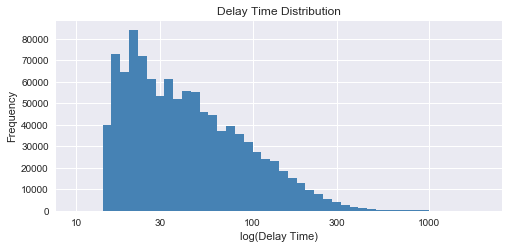

In [32]:
# plotting delay duration on a log scale
plt.style.use('seaborn')
plt.subplots(figsize=[8,3.5])

bin_edges = 10**np.arange(1, 3.3+0.05, 0.05)
ticks = [10,30,100,300,1000]
plt.hist(df_flight_raw.query('DELAYED==True')['DELAY_TIME'], bins=bin_edges,color='steelblue');
plt.xscale('log')
plt.xticks(ticks,ticks)

plt.title('Delay Time Distribution');
plt.xlabel('log(Delay Time)');
plt.ylabel('Frequency');

<p>When plotted on a log-scale, I can see that the delay time distribution have unimodal right-skewed, with peak at below 30.</p>
<p>Next up, I move on to the other variables in the dataset: distance, schedule time.</p>

In [33]:
# DISTANCE

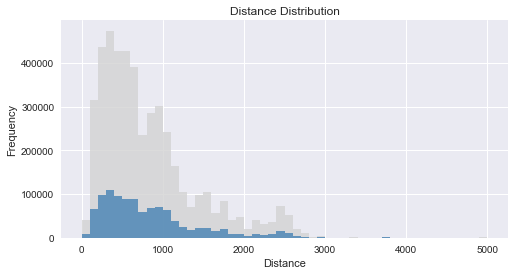

In [34]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=[8,4])

bin_edges = np.arange(0, df_flight_raw['DISTANCE'].max()+100, 100) 
ax.hist(df_flight_raw.query('DELAYED==False & CANCELLED==False & DIVERTED==False')
        ['DISTANCE'], bins=bin_edges, color='lightgray', label='On Schedule Flight', alpha=0.8);
ax.hist(df_flight_raw.query('DELAYED==True')
        ['DISTANCE'], bins=bin_edges, color='steelblue', label='Delayed Flight', alpha=0.8);

ax.set_title('Distance Distribution');
ax.set_xlabel('Distance');
ax.set_ylabel('Frequency');

In [35]:
# SCHEDULED_TIME

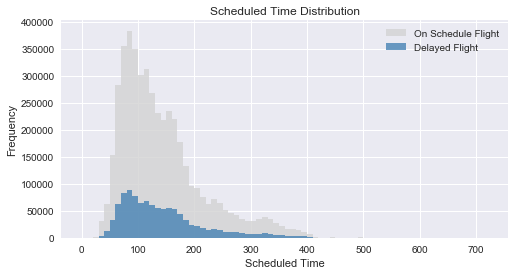

In [36]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=[8,4])

bin_edges = np.arange(0, df_flight_raw['SCHEDULED_TIME'].max()+10, 10) 
ax.hist(df_flight_raw.query('DELAYED==False & CANCELLED==False & DIVERTED==False')
        ['SCHEDULED_TIME'], bins=bin_edges, color='lightgrey', label='On Schedule Flight', alpha=0.8);
ax.hist(df_flight_raw.query('DELAYED==True')
        ['SCHEDULED_TIME'], bins=bin_edges, color='steelblue', label='Delayed Flight', alpha=0.8);

ax.set_title('Scheduled Time Distribution');
ax.set_xlabel('Scheduled Time');
ax.set_ylabel('Frequency');
ax.legend();

Both schedule time distribution and distance distribution have right-skewed distribution. From looking at the distribution of these 2 features, delayed flights doesn't seem to have a strong relationship with distance and schedule time. This can be seen from the existence of on-scheduled flights at the same distance or the same schedule time.<br/>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
16.7% of US flights in 2015 were disrupted. Most cases were due to delayed flight. NK is the airline which has the highest disruption rate (relative to NK's flights), while HA is the airline which has the lowest disruption rate. Daily disruption rate has right-skewed distribution where median at 0.1756.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Delay time, schedule time, and distance have right-skewed distribution. I didn't perform any operations to exclude outliers in this section because this dataset shows the actual conditions of the flight (outliers are not due to data quality issues).

## Bivariate Exploration

<p>Let's breakdown airline's disruption rate by flight status (delayed, canceled, diverted).

In [37]:
# DISRUPTION_RATE, AIRLINE

In [38]:
df_flight_agg_airline = df_flight_agg.groupby('AIRLINE', as_index=False)\
                        [['NUM_DELAY_FLIGHT','NUM_CANCEL_FLIGHT','NUM_DIVERT_FLIGHT','NUM_DISRUPTED_FLIGHT','NUM_FLIGHT']]\
                        .sum()

df_flight_agg_airline['DELAY_RATE'] = df_flight_agg_airline['NUM_DELAY_FLIGHT']*1.0/df_flight_agg_airline['NUM_FLIGHT']
df_flight_agg_airline['CANCEL_RATE'] = df_flight_agg_airline['NUM_CANCEL_FLIGHT']*1.0/df_flight_agg_airline['NUM_FLIGHT']
df_flight_agg_airline['DIVERT_RATE'] = df_flight_agg_airline['NUM_DIVERT_FLIGHT']*1.0/df_flight_agg_airline['NUM_FLIGHT']
df_flight_agg_airline['DISRUPTION_RATE'] = df_flight_agg_airline['NUM_DISRUPTED_FLIGHT']*1.0/df_flight_agg_airline['NUM_FLIGHT']

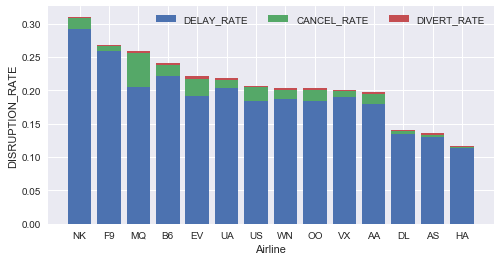

In [39]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=[8,4])

cols = ['DELAY_RATE','CANCEL_RATE','DIVERT_RATE']
data = df_flight_agg_airline.sort_values(by='DISRUPTION_RATE', ascending=False)
bottom = 0
for i in range(len(cols)):
    ax.bar(x=data['AIRLINE'], height=data[cols[i]], bottom=bottom, label=cols[i]);
    bottom = bottom+data[cols[i]]
    
ax.legend(loc=1, ncol=3);
ax.set_xlabel('Airline');
ax.set_ylabel('DISRUPTION_RATE');

<p>Similar with previous finding in Univariate Exploration section, delayed flight is also the most disruption cases in each airline are delayed flights.</p> <p>Let's look at the pairwise correlations present between features in the dataset.</p>

***Investigate relationships between pairs of numeric variables.***

In [40]:
# DISRUPTION_RATE, other numeric variables

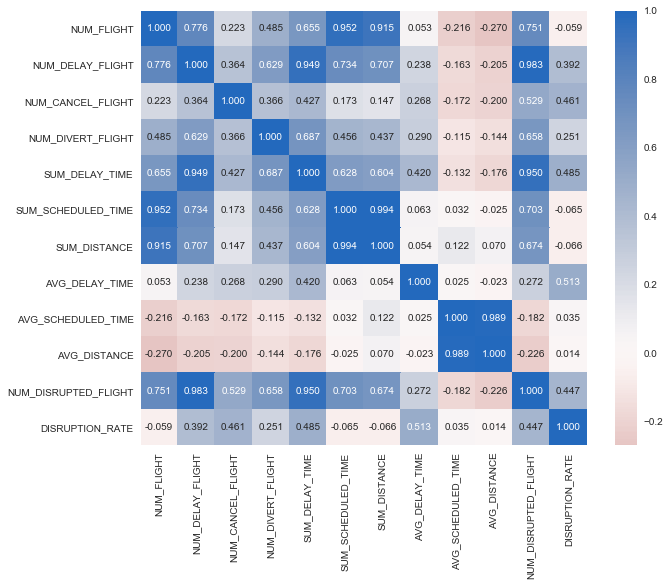

In [41]:
plt.figure(figsize=[10,8])
sns.heatmap(df_flight_agg.iloc[:,5:].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0);

<p>I eliminated SUM_DELAY_TIME due to this feature has relationship with AVG_DELAY_TIME. I also eliminate NUM_CANCEL_FLIGHT and NUM_DELAY_FLIGHT due to has strong relationship with NUM_DISRUPTIED_FLIGHT.</p> 
<p>Airline's daily average delay time (corr=0.513) and daily number of disrupted flights (corr=0.447) have positive moderate correlation to airline's disruption rate. Now, let's see those relationships by creating scatter plots.</p>

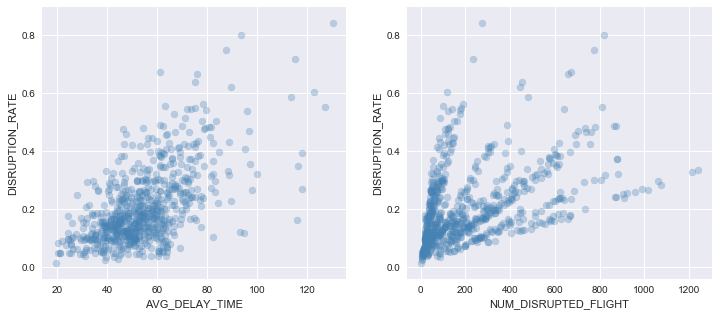

In [42]:
corr_cols = ['AVG_DELAY_TIME','NUM_DISRUPTED_FLIGHT']
samples = np.random.choice(df_flight_agg.shape[0], 700, replace = False)
df_flight_samp = df_flight_agg.loc[samples,:]

plt.style.use('seaborn')
fig, ax = plt.subplots(ncols=len(corr_cols),figsize=[12,5])
for i in range(len(corr_cols)):
    ax[i].scatter(x=df_flight_samp[corr_cols[i]], y=df_flight_samp['DISRUPTION_RATE'], color='steelblue', alpha='0.3');
    ax[i].set_xlabel(corr_cols[i]);
    ax[i].set_ylabel('DISRUPTION_RATE');   

<p>Airline's daily average delay time and daily number of disrupted flights have linear relationship with airline's disruption rate.</p>
<p>Let's look deeper to those features for each airline.</p>

In [43]:
# DISRUPTION RATE, AVG DELAY TIME, AIRLINE

<Figure size 720x1440 with 0 Axes>

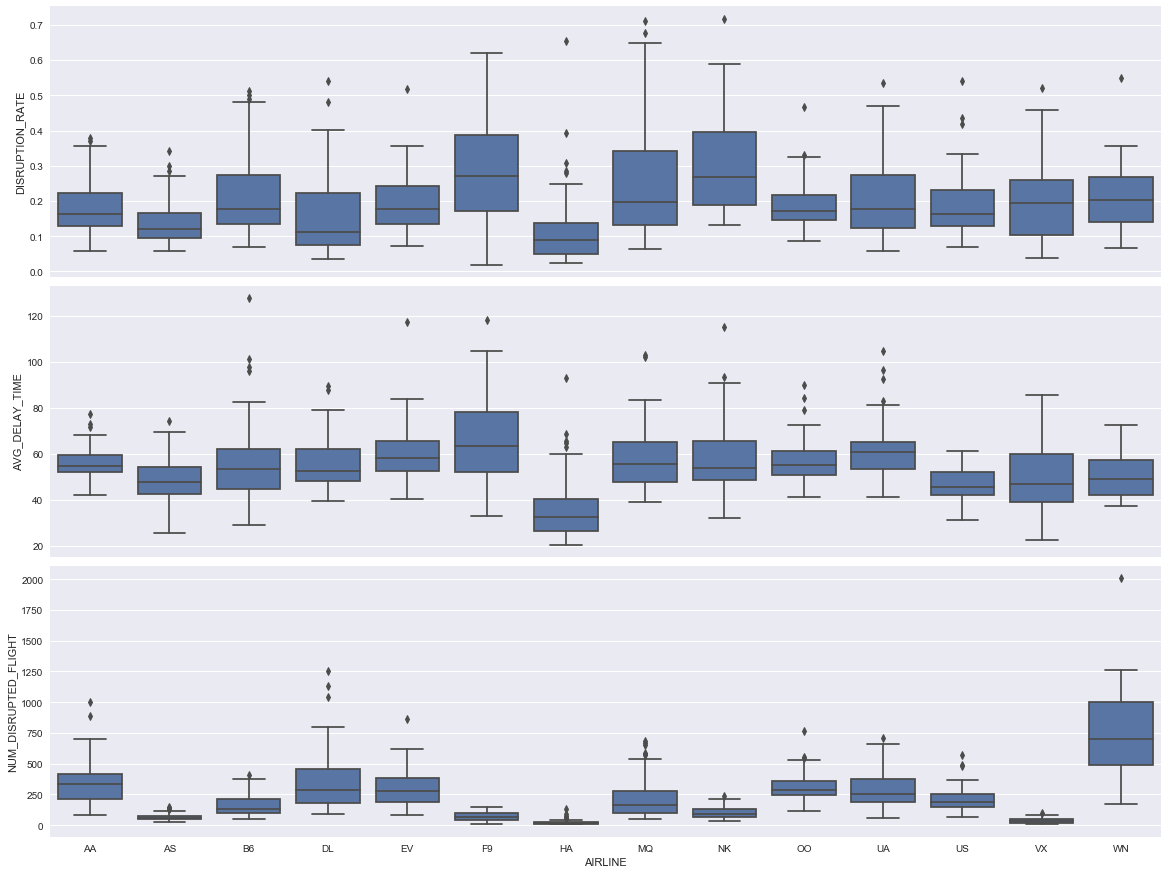

In [44]:
samples = np.random.choice(df_flight_agg.shape[0], 700, replace = False)
df_flight_samp = df_flight_agg.loc[samples,:].sort_values(by='AIRLINE')

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color);
    
plt.figure(figsize = [10, 20]);
plt.style.use('seaborn')

nemeric_cols = ['DISRUPTION_RATE','AVG_DELAY_TIME', 'NUM_DISRUPTED_FLIGHT']
g = sns.PairGrid(data = df_flight_samp, y_vars=nemeric_cols, x_vars='AIRLINE', height=4, aspect=4);
g.map(boxgrid);

Interesting findings from boxplots above are:
- In number disrupted flighs, **one box plot is much higher than others - see WN**. In most days, WN has number of disrupted flights which were higher than other airlines. WN has 1st quartile daily disrupted flights which was higher than median daily disrupted flights in other airlines. But WN has median daily disruption rate and median daily average delay time lower than NK and F9. It means WN has high number of flight schedules.
- In those 3 metrics, **HA consistently showed lower median** values compared to others. I can conclude that HA is the best airline in 2015 based on those 3 metrics.

***Investigate relationships between pairs of numeric variable and categorical variable.***

In [45]:
# DISRUPTION_RATE, Day of Week

In [46]:
def map_dow(code):
    if code==1: return "Mon"
    elif code==2: return "Tue"
    elif code==3: return "Wed"
    elif code==4: return "Thu"
    elif code==5: return "Fri"
    elif code==6: return "Sat"
    elif code==7: return "Sun"

In [47]:
df_flight_agg_dow = df_flight_agg.groupby('DAY_OF_WEEK', as_index=False)\
                        [['NUM_DELAY_FLIGHT','NUM_CANCEL_FLIGHT','NUM_DIVERT_FLIGHT','NUM_DISRUPTED_FLIGHT','NUM_FLIGHT']]\
                        .sum()

df_flight_agg_dow['DAY_OF_WEEK_STR'] = df_flight_agg_dow['DAY_OF_WEEK'].apply(lambda x: map_dow(x))
df_flight_agg_dow['DELAY_RATE'] = df_flight_agg_dow['NUM_DELAY_FLIGHT']*1.0/df_flight_agg_dow['NUM_FLIGHT']
df_flight_agg_dow['CANCEL_RATE'] = df_flight_agg_dow['NUM_CANCEL_FLIGHT']*1.0/df_flight_agg_dow['NUM_FLIGHT']
df_flight_agg_dow['DIVERT_RATE'] = df_flight_agg_dow['NUM_DIVERT_FLIGHT']*1.0/df_flight_agg_dow['NUM_FLIGHT']
df_flight_agg_dow['DISRUPTION_RATE'] = df_flight_agg_dow['NUM_DISRUPTED_FLIGHT']*1.0/df_flight_agg_dow['NUM_FLIGHT']

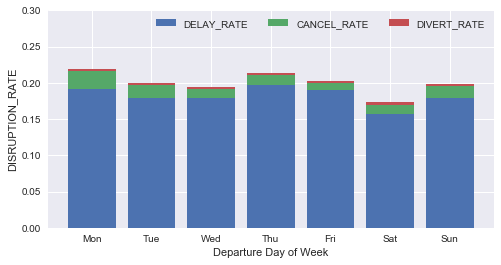

In [48]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=[8,4])

cols = ['DELAY_RATE','CANCEL_RATE','DIVERT_RATE']
data = df_flight_agg_dow.sort_values(by='DAY_OF_WEEK', ascending=True)
bottom = 0
for i in range(len(cols)):
    ax.bar(x=data['DAY_OF_WEEK_STR'], height=data[cols[i]], bottom=bottom, label=cols[i]);
    bottom = bottom+data[cols[i]]

ax.legend(loc=1, ncol=3);
ax.set_ylim(0, 0.3)
ax.set_xlabel('Departure Day of Week');
ax.set_ylabel('DISRUPTION_RATE');

Weekend's flight departures doesn't have higher flight disruption rate compared to weekdays.

In [49]:
# DISRUPTION_RATE, Month

In [50]:
df_flight_agg_month = df_flight_agg.groupby('MONTH', as_index=False)\
                        [['NUM_DELAY_FLIGHT','NUM_CANCEL_FLIGHT','NUM_DIVERT_FLIGHT','NUM_DISRUPTED_FLIGHT','NUM_FLIGHT']]\
                        .sum()

df_flight_agg_month['DELAY_RATE'] = df_flight_agg_month['NUM_DELAY_FLIGHT']*1.0/df_flight_agg_month['NUM_FLIGHT']
df_flight_agg_month['CANCEL_RATE'] = df_flight_agg_month['NUM_CANCEL_FLIGHT']*1.0/df_flight_agg_month['NUM_FLIGHT']
df_flight_agg_month['DIVERT_RATE'] = df_flight_agg_month['NUM_DIVERT_FLIGHT']*1.0/df_flight_agg_month['NUM_FLIGHT']
df_flight_agg_month['DISRUPTION_RATE'] = df_flight_agg_month['NUM_DISRUPTED_FLIGHT']*1.0/df_flight_agg_month['NUM_FLIGHT']

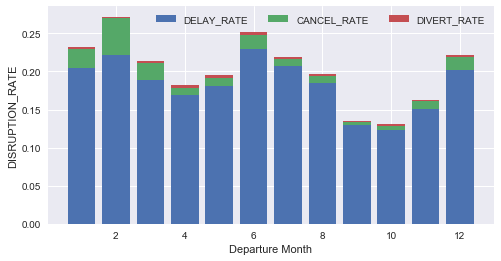

In [51]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=[8,4])

cols = ['DELAY_RATE','CANCEL_RATE','DIVERT_RATE']
data = df_flight_agg_month.sort_values(by='MONTH', ascending=True)
bottom = 0
for i in range(len(cols)):
    ax.bar(x=data['MONTH'], height=data[cols[i]], bottom=bottom, label=cols[i]);
    bottom = bottom+data[cols[i]]

ax.legend(loc=1, ncol=3);
ax.set_xlabel('Departure Month');
ax.set_ylabel('DISRUPTION_RATE');

<p>As expected, there is trends of year-sesionality of airline's disruption rate. I found that airline's disruption rate in the begin-year (Jan-Feb), in the mid-year (Jun-Jul), and in the end-year (Dec) was tend have higher disruption rate compared to months of normal season.</p>
<p>I want to look deeper to see disruption rate trend each airline.</p>

In [52]:
# AVG DELAY TIME, DEPARTURE DATE, AIRLINE

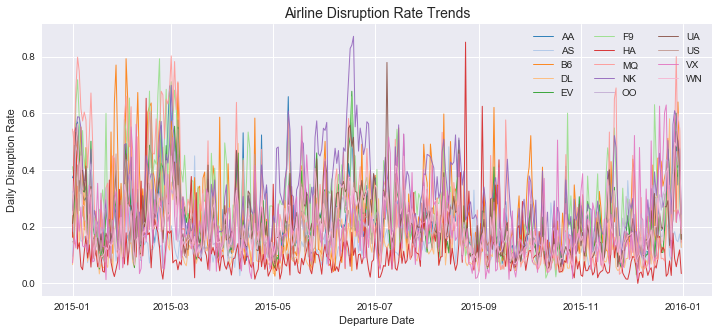

In [53]:
plt.style.use('seaborn')
plt.figure(figsize=(12,5))

counter = 0
palette = plt.get_cmap('tab20')
for airline in df_flight_agg['AIRLINE'].unique():
    plt.plot(df_flight_agg[df_flight_agg['AIRLINE']==airline].DEPARTURE_DATE,
             df_flight_agg[df_flight_agg['AIRLINE']==airline].DISRUPTION_RATE, 
             marker='', color=palette(counter), linewidth=1, alpha=0.9, label=airline);
    counter += 1

plt.legend(loc=1, ncol=3);
plt.xlabel("Departure Date");
plt.ylabel("Daily Disruption Rate");
plt.title("Airline Disruption Rate Trends", fontsize=14);

I can't see over time trends in this chart which is using daily disruption rate as its matric. Therefore, I will replot this chart by using moving average instead.

In [54]:
df_flight_agg['MA_DISRUPTION_RATE'] = df_flight_agg\
                                        .sort_values(by=['DEPARTURE_DATE'], ascending=True)\
                                        .groupby('AIRLINE')['DISRUPTION_RATE']\
                                        .rolling(60).mean()\
                                        .reset_index(drop=True, level=0)
df_flight_agg.dropna().head()

,DEPARTURE_DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,NUM_FLIGHT,NUM_DELAY_FLIGHT,NUM_CANCEL_FLIGHT,NUM_DIVERT_FLIGHT,SUM_DELAY_TIME,SUM_SCHEDULED_TIME,SUM_DISTANCE,AVG_DELAY_TIME,AVG_SCHEDULED_TIME,AVG_DISTANCE,NUM_DISRUPTED_FLIGHT,DISRUPTION_RATE,MA_DISRUPTION_RATE
826,2015-03-01,3,1,7,AA,1450,559.0,287.0,12.0,39697.0,252839.0,1562686,71.014311,174.371724,1077.714483,858.0,0.591724,0.255142
827,2015-03-01,3,1,7,AS,442,85.0,3.0,2.0,5444.0,80129.0,523483,64.047059,181.287330,1184.350679,90.0,0.203620,0.151625
828,2015-03-01,3,1,7,B6,744,395.0,13.0,18.0,38335.0,129981.0,793159,97.050633,174.705645,1066.073925,426.0,0.572581,0.342086
829,2015-03-01,3,1,7,DL,2232,678.0,99.0,21.0,54686.0,338247.0,1939327,80.657817,151.544355,868.874104,798.0,0.357527,0.176601
830,2015-03-01,3,1,7,EV,1586,592.0,177.0,12.0,35351.0,156810.0,718333,59.714527,98.871375,452.921185,781.0,0.492434,0.275383


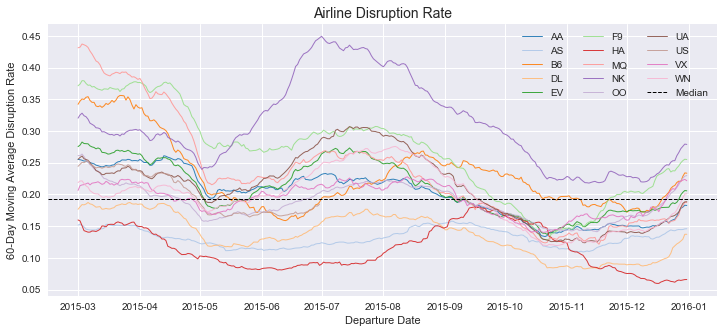

In [55]:
# re-plot by 60d moving averate instead daily disruption rate
plt.style.use('seaborn')
plt.figure(figsize=(12,5))

counter = 0
palette = plt.get_cmap('tab20')
for airline in df_flight_agg['AIRLINE'].unique():
    plt.plot(df_flight_agg[df_flight_agg['AIRLINE']==airline].DEPARTURE_DATE,
             df_flight_agg[df_flight_agg['AIRLINE']==airline].MA_DISRUPTION_RATE, 
             marker='', color=palette(counter), linewidth=1, alpha=0.9, label=airline);
    counter += 1

plt.axhline(df_flight_agg.dropna()['MA_DISRUPTION_RATE'].median(), color='black', linestyle='dashed', linewidth=1, label='Median')

plt.legend(loc=1, ncol=3);
plt.xlabel("Departure Date");
plt.ylabel("60-Day Moving Average Disruption Rate");
plt.title("Airline Disruption Rate", fontsize=14);

Based on 60-day moving average disruption rate, **HA, AS, and DL are the top 3 best airlines**. They most of the time have a 60-day moving average disruption rate below the median. While **NK is the worst airline**. NK has 60-day moving average disruption rate above the median over time. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Airline's daily average delay time and daily number of disrupted flights have linear relationship with positive moderate correlation to airline's disruption rate. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Weekend's flight departures doesn't have higher flight disruption rate compared to weekdays. But there is trends of year-sesionality of airline's disruption rate. I found that airline's disruption rate in the begin-year (Jan-Feb), in the mid-year (Jun-Jul), and in the end-year (Dec) was tend have higher disruption rate compared to months of normal season.

## Multivariate Exploration
I want to look deeper relationship average delay time and number of disrupted flights to disruption rate by breaking down previous scatter plot by airline.

In [56]:
# DISRUPTION RATE, AVG DELAY TIME, AIRLINE 

In [57]:
def hexbingrid(x,y, color, **kwargs):
    plt.hexbin(x, y, gridsize=20, cmap='Blues', **kwargs)

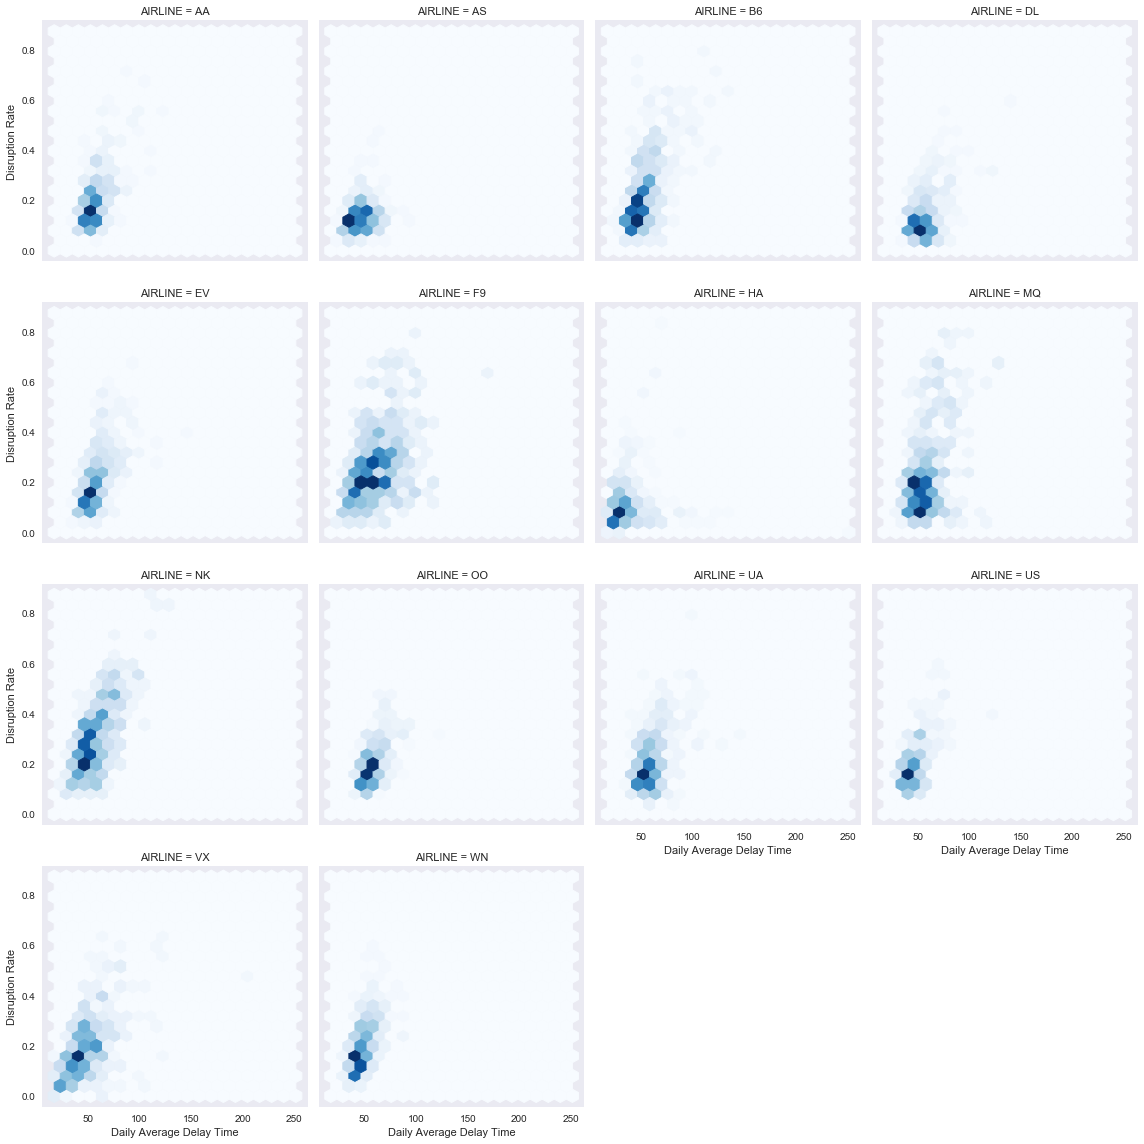

In [58]:
x = df_flight_agg.AVG_DELAY_TIME
y = df_flight_agg.DISRUPTION_RATE
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

with sns.axes_style("dark"):
    g = sns.FacetGrid(data=df_flight_agg, col='AIRLINE', col_wrap=4,height=4);
g.map(hexbingrid, 'AVG_DELAY_TIME', 'DISRUPTION_RATE', extent=[xmin, xmax, ymin, ymax]);

g.set_xlabels('Daily Average Delay Time');
g.set_ylabels('Disruption Rate');

In [59]:
# DISRUPTION RATE, DISRUPTED FLIGHT, AIRLINE 

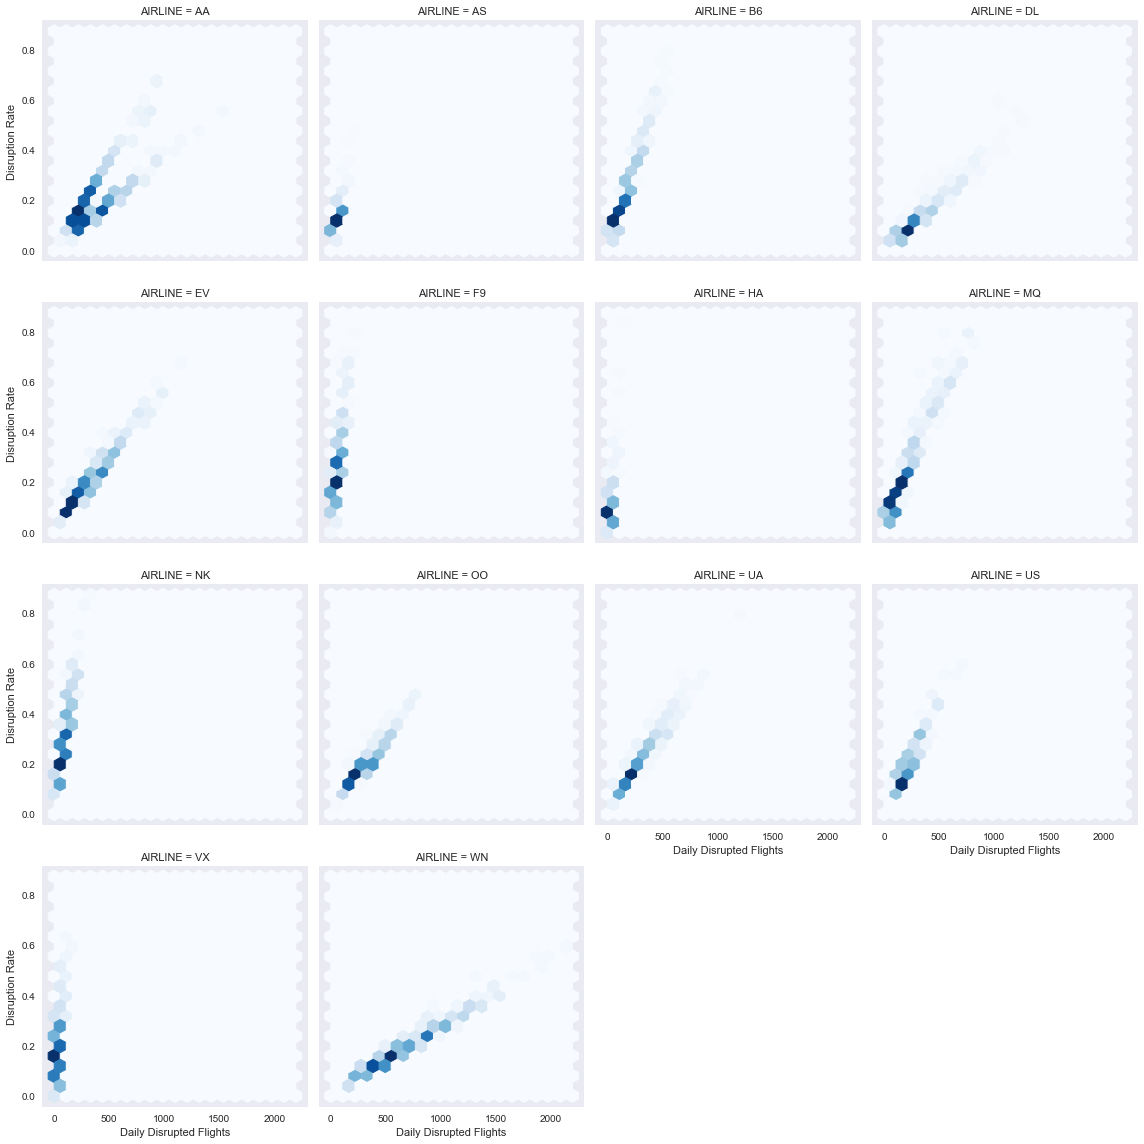

In [60]:
x = df_flight_agg.NUM_DISRUPTED_FLIGHT
y = df_flight_agg.DISRUPTION_RATE
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

with sns.axes_style("dark"):
    g = sns.FacetGrid(data=df_flight_agg, col='AIRLINE', col_wrap=4,height=4);
g.map(hexbingrid, 'NUM_DISRUPTED_FLIGHT', 'DISRUPTION_RATE', extent=[xmin, xmax, ymin, ymax]);

g.set_xlabels('Daily Disrupted Flights');
g.set_ylabels('Disruption Rate');

In [61]:
airlines = df_flight_agg.sort_values(by='AIRLINE')['AIRLINE'].unique()
for airline in airlines:
    data = df_flight_agg.query('AIRLINE=="{}"'.format(airline))
    corr = data.loc[:,['NUM_DISRUPTED_FLIGHT','DISRUPTION_RATE']].corr(method ='pearson') 
    print(airline, corr)
    print('\n')

AA                       NUM_DISRUPTED_FLIGHT  DISRUPTION_RATE
NUM_DISRUPTED_FLIGHT               1.00000          0.81855
DISRUPTION_RATE                    0.81855          1.00000


AS                       NUM_DISRUPTED_FLIGHT  DISRUPTION_RATE
NUM_DISRUPTED_FLIGHT               1.00000          0.98715
DISRUPTION_RATE                    0.98715          1.00000


B6                       NUM_DISRUPTED_FLIGHT  DISRUPTION_RATE
NUM_DISRUPTED_FLIGHT              1.000000         0.995341
DISRUPTION_RATE                   0.995341         1.000000


DL                       NUM_DISRUPTED_FLIGHT  DISRUPTION_RATE
NUM_DISRUPTED_FLIGHT              1.000000         0.977002
DISRUPTION_RATE                   0.977002         1.000000


EV                       NUM_DISRUPTED_FLIGHT  DISRUPTION_RATE
NUM_DISRUPTED_FLIGHT              1.000000         0.978353
DISRUPTION_RATE                   0.978353         1.000000


F9                       NUM_DISRUPTED_FLIGHT  DISRUPTION_RATE
NUM_DISRUPTE

After breaking down scatterplot of disrupted flight and disruption rate relationship by airlines, I see the strong linear relationship between disrupted flight and disruption rate. Each airline has different slope.

In [62]:
# DISRUPTION RATE, AVG DELAY TIME, NUM DISRUPTED FLIGHT, AIRLINE

In [63]:
df_flight_agg_airline = df_flight_agg.groupby('AIRLINE', as_index=False)[['NUM_FLIGHT','NUM_DELAY_FLIGHT','NUM_DISRUPTED_FLIGHT','SUM_DELAY_TIME']].sum()
df_flight_agg_airline['DISRUPTION_RATE'] = df_flight_agg_airline['NUM_DISRUPTED_FLIGHT']*1.0/df_flight_agg_airline['NUM_FLIGHT']
df_flight_agg_airline['AVG_DELAY_TIME'] = df_flight_agg_airline['SUM_DELAY_TIME']*1.0/df_flight_agg_airline['NUM_DELAY_FLIGHT']

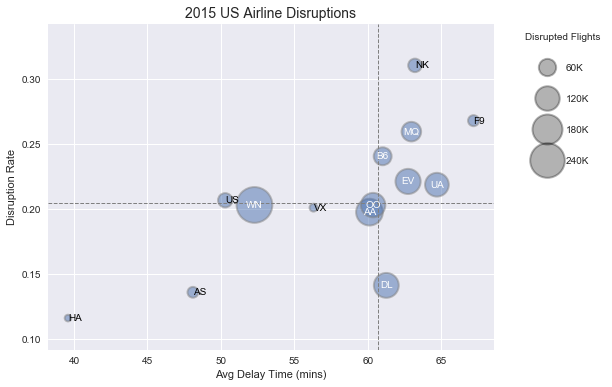

In [64]:
fig, ax = plt.subplots(figsize=[8,6]);
x = df_flight_agg_airline['AVG_DELAY_TIME']
y = df_flight_agg_airline['DISRUPTION_RATE']
z = df_flight_agg_airline['NUM_DISRUPTED_FLIGHT']
label = df_flight_agg_airline['AIRLINE']

scatter = ax.scatter(x, y, s=z*0.005, alpha=0.5, edgecolors="gray", linewidth=2);

ax.set_xlabel("Avg Delay Time (mins)");
ax.set_ylabel("Disruption Rate");
ax.set_title("2015 US Airline Disruptions", fontsize=14);
ax.axhline(df_flight_agg_airline['DISRUPTION_RATE'].median(), 
           color='gray', linestyle='dashed', linewidth=1, label='Median Disruption Rate')
ax.axvline(df_flight_agg_airline['AVG_DELAY_TIME'].median(), 
           color='gray', linestyle='dashed', linewidth=1, label='Median Avg Delay Time')

#For each point, we add a text inside the bubble
for line in range(0,df_flight_agg_airline.shape[0]):
    if z[line]<60000: 
        color='black' 
        horizontalalignment='left'
    else: 
        color='white'
        horizontalalignment='center'
    
    ax.text(x[line], y[line], label[line], 
             verticalalignment='center', horizontalalignment=horizontalalignment, size='medium', color=color)

handles, labels = scatter.legend_elements(prop='sizes', alpha=0.3, num=4)
labels1 = ["{}K".format(int(int(re.search("\d+", x)[0])/0.005/1000)) for x in labels]
legend = ax.legend(handles, labels1, loc="upper left", title='Disrupted Flights', labelspacing=2.2, bbox_to_anchor=(1.05, 1.0))

I create 4 quadrants in above bubbleplot to identify which are the best and the worst airlines in 2015. I found that **HA, AS, and VN are the best airlines** in 2015 in terms of flight disruption handling. They have disruption rate and average delay time lower than median - see quadrant 1 (buttom left). **NK, F9, MQ, UA, and EV are the worse** airlines in 2015 in terms of flight disruption handling. They have disruption rate and average delay time higher than median - see quadrant 4 (top right).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
<p>After breaking down scatterplot of disrupted flights and disruption rate relationship by airlines, I see the strong correlation between disrupted flight and disruption rate. It is something that I didn't see when analyze those features in bivariate exploration section.</p>
<p>Previously, when I explore disrupted flights and disruption rate relationship in overall airlines, those features have moderate correlation. I found it is caused each airline has different slope.</p>

### Were there any interesting or surprising interactions between features?
<p>There are surprising interaction between disrupted flights and disruption rate after I breaked it down by airline. Those features drasticly showed a strong correlation.</p>